In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from resample.bootstrap import bootstrap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from resample.bootstrap import bootstrap
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets

In [48]:
os.environ['http_proxy'] = 'http://10.246.170.130:3128'
os.environ['https_proxy'] = 'http://10.246.170.130:3128'
os.environ['no_proxy'] = 't-internal.com'

In [5]:
os.getcwd()

'C:\\Users\\A200083283\\OneDrive - Deutsche Telekom AG\\non_DT\\uni\\WS_22\\AI\\exc'

In [11]:
data_oct = pd.read_csv("./Oct.csv").drop("Unnamed: 0", axis=1)
data_ocr = pd.read_csv("./Ocr.csv").drop("Unnamed: 0", axis=1)

data_oct


,price,km,age,km10,power_lowest,power_low,power_mid,power_high,power_highest,ba,...,za,diesel,petrol,petgas,man,eng1,eng2,eng3,eng4,eng6
0,16990,180.711,4,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,24990,120.000,4,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,5990,266.000,12,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
3,15500,231.000,8,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,7300,117.521,11,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,29800,38.916,2,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
176,29800,30.000,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
177,29990,15.000,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
178,34990,0.015,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [15]:
data_ocr

,price,km,age,km10,power_lowest,power_low,power_mid,power_high,power_highest,ba,...,za,diesel,petrol,petgas,man,eng1,eng2,eng3,eng4,eng6
0,11699,186.533,8,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,21499,195.900,4,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,20050,184.476,3,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4500,275.000,10,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,24999,26.866,2,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,7600,271.999,13,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
716,14200,200.000,5,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
717,4750,261.403,16,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
718,10900,185.488,9,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0


# Task 01

In [16]:
y = data_ocr[['price']]
X = data_ocr.drop('price', axis=1)

In [17]:
X = sm.add_constant(X)

In [21]:
m1 = sm.OLS(endog=y, exog=X)
res = m1.fit()

In [24]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     198.3
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          2.76e-287
Time:                        12:38:07   Log-Likelihood:                -6530.8
No. Observations:                 720   AIC:                         1.311e+04
Df Residuals:                     696   BIC:                         1.322e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.587e+04    723.839     21.926      0.000    1.44e+04    1.73e+04
km              -26.9197      1.610    -16.722      0.000     -30.081     -23.759
age            -928.1298     37.628    -24.666      0.000   -1002.008    -854.252
km10           2844.1681    818.052      3.477      0.001    1238.022    4450.314
power_lowest    546.4812   1044.992      0.523      0.601   -1505.232    2598.195
power_low     -1488.9601   1250.486     -1.191      0.234   -3944.136     966.216
power_mid      -178.5473   1136.892     -0.157      0.875   -2410.696    2053.602
power_high     3380.6019    994.816      3.398      0.001    1427.403    5333.801
power_highest  4662.8741    978.966      4.763      0.000    2740.793    6584.955
ba             2314.7927    188.843     12.258      0.000    1944.022    2685.564
bb             1520.1303    244.857      6.208      0.000    1039.383    2000.878
ke             2006.6839    219.321      9.150      0.000    1576.075    2437.293
nr             1722.2264    221.388      7.779      0.000    1287.557    2156.895
po             2292.2014    278.671      8.225      0.000    1745.065    2839.337
tn             1937.3653    300.375      6.450      0.000    1347.616    2527.115
tt             1814.8987    274.586      6.610      0.000    1275.782    2354.016
za             2262.8395    234.738      9.640      0.000    1801.961    2723.718
diesel         5071.1610    471.494     10.756      0.000    4145.441    5996.881
petrol         4979.0087    388.680     12.810      0.000    4215.883    5742.135
petgas         5820.9684    870.408      6.688      0.000    4112.028    7529.909
man            -864.9576    181.268     -4.772      0.000   -1220.855    -509.060
eng1           2578.3867   1017.572      2.534      0.011     580.507    4576.266
eng2           1046.9784   1032.673      1.014      0.311    -980.550    3074.506
eng3            494.5600    824.086      0.600      0.549   -1123.433    2112.553
eng4           -874.0048    735.010     -1.189      0.235   -2317.107     569.097
eng6           -694.7653    623.268     -1.115      0.265   -1918.476     528.945
==============================================================================
Omnibus:                      129.812   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.572
Skew:                           0.838   Prob(JB):                     9.60e-96
Kurtosis:                       6.432   Cond. No.                     6.81e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.41e-27. This might indicate that there are
strong multicollinearity problems or that the design ma

In [33]:
y_pred = res.predict(sm.add_constant(data_oct.drop('price', axis=1)))
y_act = data_oct['price']

C:\Users\A200083283\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 40000.0)

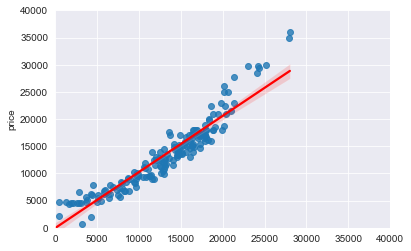

In [38]:
a_plot = sns.regplot(y_pred, y_act, line_kws={'color': 'red'})
a_plot.set_ylim(0, 40000)
a_plot.set_xlim(0, 40000)

In [49]:
iris = sns.load_dataset('iris')


URLError: <urlopen error [Errno 11002] getaddrinfo failed>

In [50]:
% env

{'ACTIVELANGUAGE': 'en-US',
 'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\A200083283\\AppData\\Roaming',
 'ASL.LOG': 'Destination=file',
 'CHASSIS': 'Notebook',
 'CHECK_PBRDEPOT': 'PBRDepot_defekt',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPDOM': 'emea2.cds.t-internal.com',
 'COMPUTERNAME': 'BE2BL857',
 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
 'CONDA_DEFAULT_ENV': 'base',
 'CONDA_PREFIX': 'C:\\Users\\A200083283\\Anaconda3',
 'CONDA_PROMPT_MODIFIER': '(base) ',
 'CONDA_SHLVL': '1',
 'CREDDIR': 'C:\\TEMP\\SECUDE',
 'CUSTOMER': 'NUC',
 'CUSTOMER_SUB': 'GENERIC',
 'CUSTOMER_TSIS': '0695',
 'DEPLOYMENTTOOLSDIR': 'C:\\DT',
 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
 'GEOID': '75',
 'HOMEDRIVE': 'T:',
 'HOMEPATH': '\\',
 'HOMESHARE': '\\\\HE202172.EMEA2.CDS.t-internal.com\\A200083283$\\HOME',
 'IDEA_INITIAL

In [51]:
import requests

requests.get("http://google.com")

<Response [200]>

In [56]:
pd.DataFrame(iris)

ValueError: Per-column arrays must each be 1-dimensional

In [77]:
iris = datasets.load_iris()
iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris.columns = iris.columns.str.replace(" ", "_")
iris

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [80]:
# Estimation - the first argument should be for the bootstrapped data
def est_model(d):
    # bootstrap() makes an array, not a DataFrame
    d = pd.DataFrame(d)
    # Oh also it tossed out the column names
    d.columns = iris.columns
    # And numeric types
    # d = d.convert_dtypes()
    print(d.dtypes)
    m = smf.ols(formula="sepal_length_(cm) ~ sepal_width_(cm) + petal_length_(cm)",
                data=d).fit()
    coefs = [m.params['sepal_width_(cm)'], m.params['petal_length_(cm)']]
    return (coefs)


# Bootstrap the iris data, estimate with est_model, and do it 1000 times
b = bootstrap(sample=iris, fn=est_model, size=1000)

# Get our standard errors
bDF = pd.DataFrame(b, columns=['SW', 'PL'])
bDF.std()

sepal_length_(cm)    float64
sepal_width_(cm)     float64
petal_length_(cm)    float64
petal_width_(cm)     float64
dtype: object


PatsyError: Error evaluating factor: NameError: name 'petal_length_' is not defined
    sepal_length_(cm) ~ sepal_width_(cm) + petal_length_(cm)
                                           ^^^^^^^^^^^^^^^^^

In [42]:
def est_model(df, formula, **vars):
    # bootstrap() makes an array, not a DataFrame
    df = pd.DataFrame(df)
    # Oh also it tossed out the column names
    df.columns = df.columns
    # And numeric types
    df = df.convert_dtypes()
    print(df.dtypes)
    m = sm.ols(formula=formula,
               data=df).fit()

    coefs = [m.params[prm] for prm in vars]
    return (coefs)

In [ ]:

# Bootstrap the iris data, estimate with est_model, and do it 1000 times
b = bootstrap(sample=iris, fn=est_model, size=1000)

# Get our standard errors
bDF = pd.DataFrame(b, columns=['SW', 'PL'])
bDF.std()